In [6]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib  # To save the model

# Function to load images and convert them to feature vectors
def load_images(folder_path, label, image_size=(64, 64)):
    images = []
    labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg"):
            image_path = os.path.join(folder_path, file_name)
            image = Image.open(image_path).convert('L')  # Convert to grayscale
            image = image.resize(image_size)
            image_array = np.array(image).flatten()  # Flatten to 1D array
            images.append(image_array)
            labels.append(label)
    return images, labels

# Load healthy and unhealthy images
healthy_images, healthy_labels = load_images('D:/AI Algorithm/cucumber/healthy/', 0)
unhealthy_images, unhealthy_labels = load_images('D:/AI Algorithm/cucumber/unhealthy/', 1)

# Combine images and labels
X = np.array(healthy_images + unhealthy_images)
y = np.array(healthy_labels + unhealthy_labels)

print(f"Total samples: {len(y)}, Healthy: {sum(y==0)}, Unhealthy: {sum(y==1)}")


Total samples: 1152, Healthy: 326, Unhealthy: 826


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")


Model accuracy: 74.46%


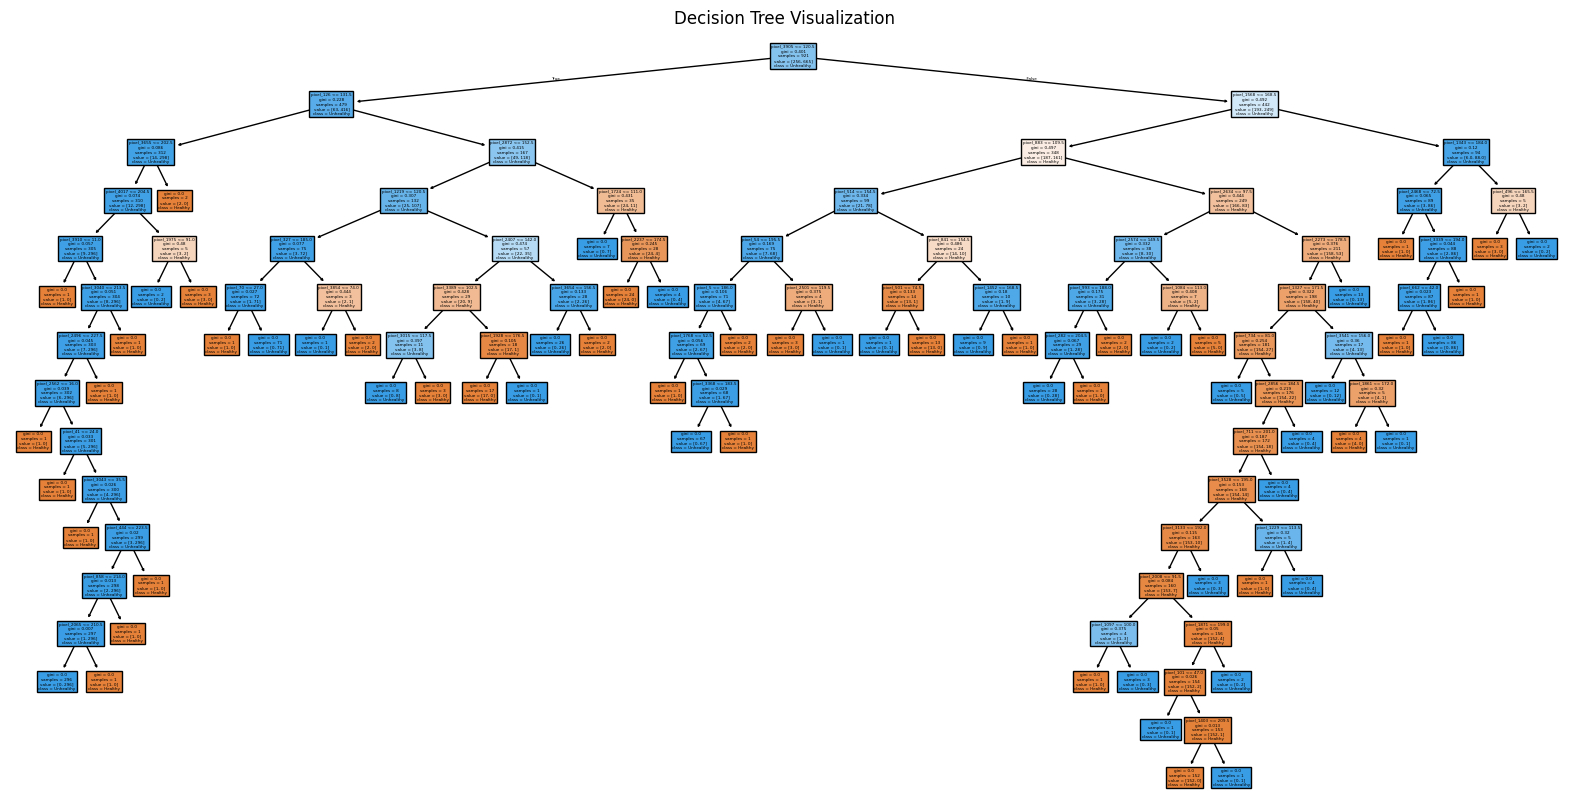

In [9]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=[f'pixel_{i}' for i in range(X.shape[1])], class_names=['Healthy', 'Unhealthy'])
plt.title("Decision Tree Visualization")
plt.show()


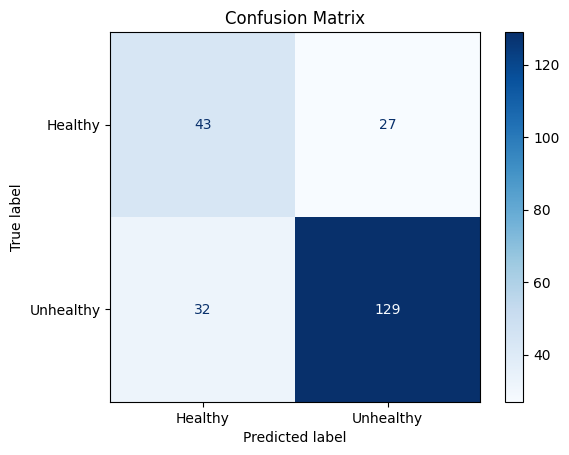

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Unhealthy'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [11]:
# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Unhealthy']))


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.57      0.61      0.59        70
   Unhealthy       0.83      0.80      0.81       161

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.75      0.74      0.75       231



In [21]:
# Save the trained model using joblib
joblib.dump(clf, 'cucumber_leaf_classifier.pkl')
print("Model saved as cucumber_leaf_classifier.pkl")

Model saved as cucumber_leaf_classifier.pkl


In [14]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    image_size = (64, 64)  # Image size used during training
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize(image_size)  # Resize to 64x64
    image_array = np.array(image).flatten()  # Flatten to 1D array
    return image_array

# Path to the new image
new_image_path = 'D:/AI Algorithm/cucumber/test_image.jpg'  # Change to your test image path

# Preprocess the image
new_image = preprocess_image(new_image_path)

# Reshape the image array to match the input shape expected by the model
new_image = new_image.reshape(1, -1)  # Reshape to 2D array with one sample

# Predict using the trained model
prediction = clf.predict(new_image)  # Assuming your decision tree model is named 'clf'

# Output the result
if prediction[0] == 0:
    print("The leaf is Healthy.")
else:
    print("The leaf is Unhealthy.")


The leaf is Healthy.


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score, r2_score

# Assuming 'clf' is your trained model and 'X_test' and 'y_test' are your test features and labels.
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probabilities for AUC and Log Loss

# Evaluation for Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Evaluation for Regression Metrics (assuming you might be dealing with probabilistic outputs)
# You may skip these if your model isn't predicting continuous values, but you can use them if needed for model comparison.
if len(y_prob) == len(y_test):  # Ensure we're comparing continuous values for MAE, MSE, etc.
    mae = mean_absolute_error(y_test, y_prob)
    mse = mean_squared_error(y_test, y_prob)
    rmse = np.sqrt(mse)
    #rmse = mean_squared_error(y_test, y_prob, squared=False)
    mape = mean_absolute_percentage_error(y_test, y_prob)

    # Computing Systematic Mean Absolute Percentage Error (SMAPE)
    epsilon = 1e-10  # Small constant to prevent division by zero
    smape = 100 * np.mean(2 * np.abs(y_prob - y_test) / (np.abs(y_prob) + np.abs(y_test) + epsilon))
    #smape = 100 * np.mean(2 * np.abs(y_prob - y_test) / (np.abs(y_prob) + np.abs(y_test)))

    evs = explained_variance_score(y_test, y_prob)
    r2 = r2_score(y_test, y_prob)

    # Mean Bias Deviation (MBD) = mean of (predicted - actual) values
    mbd = np.mean(y_pred - y_test)

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
    print(f"Systematic Mean Absolute Percentage Error (SMAPE): {smape:.2f}")
    print(f"Explained Variance Score: {evs:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print(f"Mean Bias Deviation (MBD): {mbd:.2f}")
else:
    print("Regression metrics are not applicable as the model is for classification.")


Accuracy: 0.74
Precision: 0.83
Recall: 0.80
F1-Score: 0.81
AUC: 0.71
Confusion Matrix:
[[ 43  27]
 [ 32 129]]
Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.26
Root Mean Squared Error (RMSE): 0.51
Mean Absolute Percentage Error (MAPE): 526394761640707.44
Systematic Mean Absolute Percentage Error (SMAPE): 51.08
Explained Variance Score: -0.21
R^2 Score: -0.21
Mean Bias Deviation (MBD): -0.02
